In [401]:
#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [402]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
from IPython.display import Image
import pydotplus
import warnings
warnings.filterwarnings('ignore')

##Problem Statement
Using the Decision Tree model, classify whether or not the borrower paid back their loan in full. 
```
For this project, we will be exploring the publicly available data from LendingClub.com. 
Lending Club connects people who need money (borrowers) with people who have money (investors). 
As an investor one would want to invest in people who showed a profile of having a high probability of paying the amount back

The data that we have is from 2007-2010.
```

In [403]:
#Feature Description
feat_desc=pd.read_excel('/content/drive/MyDrive/Loan Defaulters/Loan_Defaulter_Data_Dictionary.xlsx')
feat_desc

,Feature,Description
0,customer.id,ID of the customer
1,credit.policy,If the customer meets the credit underwriting ...
2,purpose,"The purpose of the loan(takes values :""creditc..."
3,int.rate,The interest rate of the loan
4,installment,The monthly installments owed by the borrower ...
5,log.annual.inc,The natural log of the self-reported annual in...
6,dti,The debt-to-income ratio of the borrower (amou...
7,fico,The FICO credit score of the borrower
8,days.with.cr.line,The number of days the borrower has had a cred...
9,revol.bal,The borrower's revolving balance (amount unpai...


### Load the dataset


In [404]:
# Code starts here
# read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/MyDrive/Loan Defaulters/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Loan Defaulters/test.csv')

#Dropping df_train Id column : train_id
train_id = df_train['Id']
df_train.drop(['Id'], axis=1, inplace=True)

# Code ends here

In [405]:
#First look at data
df_train.head(10)

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA006270,Yes,debt_consolidation,12.53%,689.41,11.513725,14.45,722,4291.000000,13171,51.8,0,Less than 5,No,Yes
1,LA001461,Yes,credit_card,10.20%,485.42,10.315597,12.87,752,5789.958333,14857,31.3,0,Less than 5,Yes,Yes
2,LA005540,Yes,debt_consolidation,12.87%,121.08,11.238436,1.58,692,3391.000000,12135,85.5,0,Less than 5,No,Yes
3,LA009021,No,all_other,15.37%,348.47,11.142007,11.01,687,5370.000000,10631,35.3,0,Less than 10,No,Yes
4,LA004366,Yes,debt_consolidation,14.61%,344.76,10.308953,11.36,672,2429.958333,10544,57.0,0,Less than 5,Yes,Yes
5,LA006736,Yes,debt_consolidation,11.48%,692.34,11.225243,15.63,747,7680.000000,23860,55.5,0,Less than 5,No,Yes
6,LA002514,Yes,home_improvement,8.00%,31.34,11.127263,9.21,742,6480.000000,4434,16.9,0,Less than 5,No,Yes
7,LA002151,Yes,debt_consolidation,12.84%,228.61,10.878047,11.59,707,2046.041667,7398,70.5,0,Less than 5,No,Yes
8,LA002846,Yes,all_other,9.63%,144.43,10.545341,0.82,747,6870.000000,752,27.9,0,Less than 5,No,No
9,LA007245,Yes,credit_card,10.25%,485.78,11.184421,23.85,737,3810.041667,27801,49.4,0,Less than 5,No,Yes


In [406]:
# Data shape and columns
print(df_train.shape)
print(df_train.columns)

(7662, 15)
Index(['customer.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'pub.rec', 'inq.last.6mths', 'delinq.2yrs',
       'paid.back.loan'],
      dtype='object')


In [407]:
#Features Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer.id        7662 non-null   object 
 1   credit.policy      7662 non-null   object 
 2   purpose            7662 non-null   object 
 3   int.rate           7662 non-null   object 
 4   installment        7662 non-null   float64
 5   log.annual.inc     7662 non-null   float64
 6   dti                7662 non-null   float64
 7   fico               7662 non-null   int64  
 8   days.with.cr.line  7662 non-null   float64
 9   revol.bal          7662 non-null   int64  
 10  revol.util         7662 non-null   float64
 11  pub.rec            7662 non-null   int64  
 12  inq.last.6mths     7662 non-null   object 
 13  delinq.2yrs        7662 non-null   object 
 14  paid.back.loan     7662 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 898.0+ KB


In [408]:
# Describe data
df_train.describe()

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec
count,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000
mean,318.073414,10.927664,12.628104,710.626990,4556.132167,16801.462151,46.674093,0.061342
std,207.121270,0.619736,6.856764,37.919831,2492.455086,32315.194429,28.956386,0.260323
min,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000,0.000000,0.000000
25%,163.570000,10.545447,7.212500,682.000000,2819.958333,3163.250000,22.600000,0.000000
50%,267.735000,10.925938,12.705000,707.000000,4113.520834,8538.500000,46.000000,0.000000
75%,430.910000,11.289782,17.940000,737.000000,5739.239583,18144.250000,70.700000,0.000000
max,940.140000,14.528354,29.960000,827.000000,17616.000000,952013.000000,119.000000,5.000000


In [409]:
#Describing data - 'object'
df_train.describe(include='object')

,customer.id,credit.policy,purpose,int.rate,inq.last.6mths,delinq.2yrs,paid.back.loan
count,7662,7662,7662,7662,7662,7662,7662
unique,7662,2,7,243,4,2,2
top,LA001442,Yes,debt_consolidation,12.53%,Less than 5,No,Yes
freq,1,6148,3176,296,7050,6768,6444


### Visualize the data


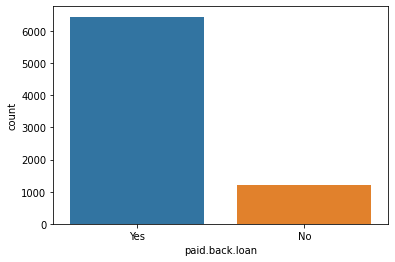

In [410]:
#Target - paid.back.loan
sns.countplot(df_train['paid.back.loan'])
#Obs: Unbalanced Classes

In [411]:
#Removing % from int.rate

# For Training set
df_train['int.rate']=df_train['int.rate'].str.replace('%','').astype(float)

# For Test set
df_test['int.rate']=df_test['int.rate'].str.replace('%','').astype(float)


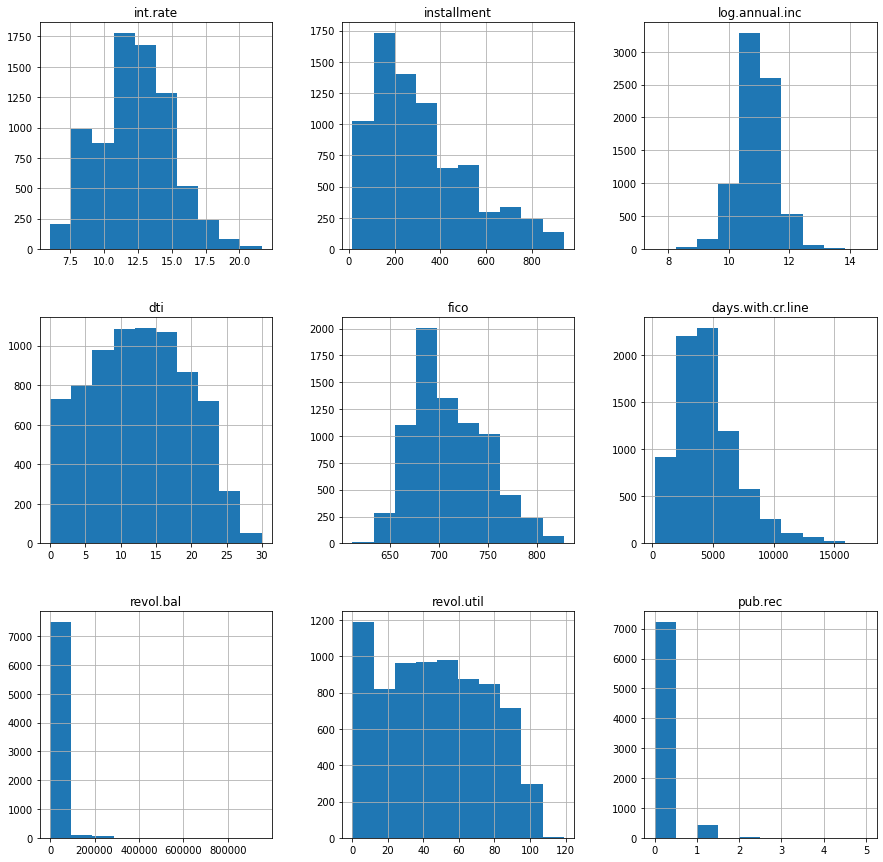

In [412]:
# Data distribution
data_distribution = df_train.hist(figsize=(15,15))
plt.show();

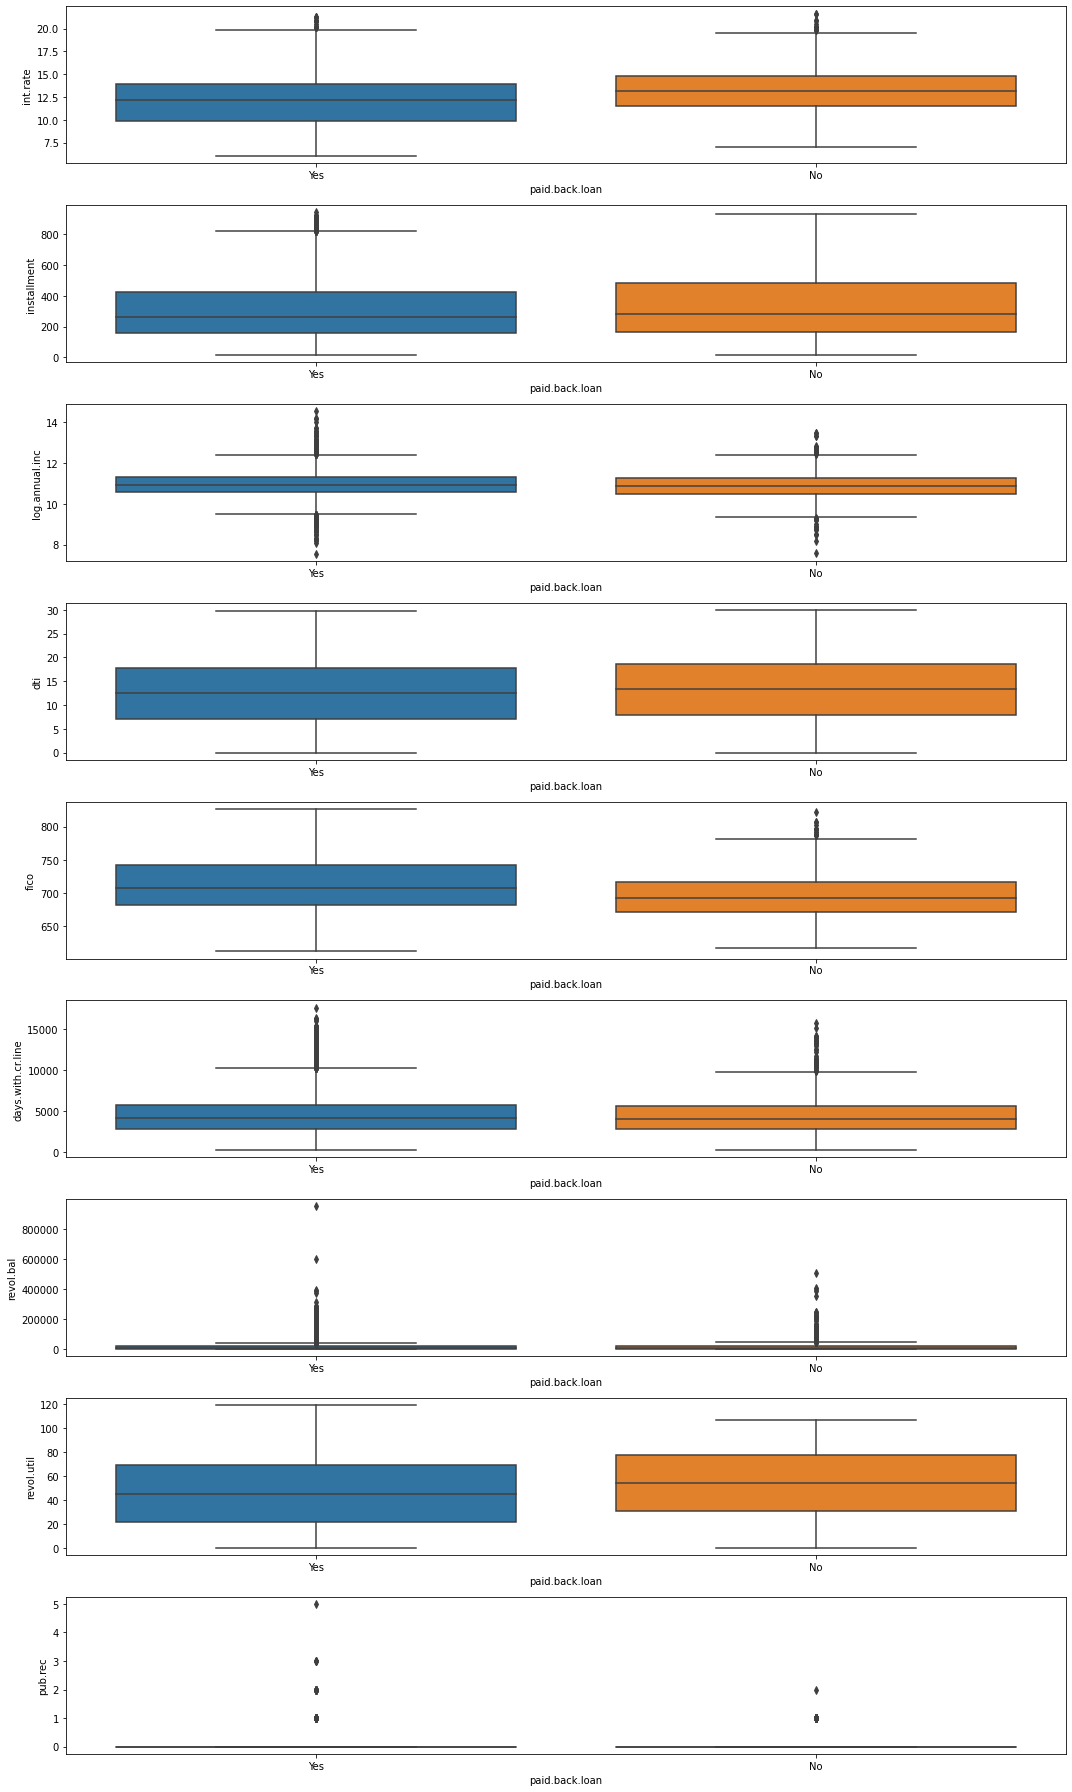

In [413]:
#Numerical Features Box-Plot

num_cols =['int.rate','installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util','pub.rec']

fig,axes=plt.subplots(9,1, figsize=(15,25))
for i in range(9):
      sns.boxplot(x=df_train['paid.back.loan'],y=df_train[num_cols[i]],ax=axes[i])
      fig.tight_layout()


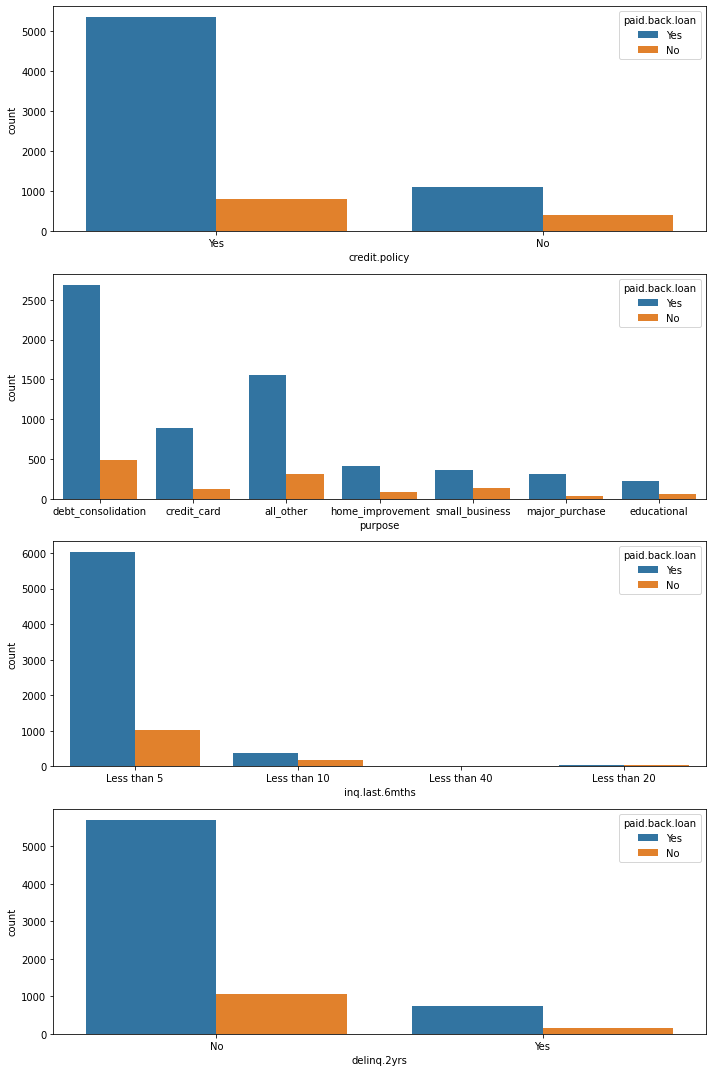

In [414]:
#Categorical Features - Count Plot

cat_cols=['credit.policy', 'purpose', 'inq.last.6mths', 'delinq.2yrs']
fig,axes=plt.subplots(4,1, figsize=(10,15))
for i in range(4):
      sns.countplot(df_train[cat_cols[i]],hue=df_train['paid.back.loan'],ax=axes[i])
      fig.tight_layout()

In [415]:
#Encoding Categorical Varible

# Initialize encoder object
encoder=LabelEncoder()

#Fit transform on target
df_train['paid.back.loan'] = encoder.fit_transform(df_train['paid.back.loan'])

# Fit-transform on training data
df_train['inq.last.6mths'] = encoder.fit_transform(df_train['inq.last.6mths'])
df_train['credit.policy'] = encoder.fit_transform(df_train['credit.policy'])
df_train['purpose'] = encoder.fit_transform(df_train['purpose'])
df_train['delinq.2yrs'] = encoder.fit_transform(df_train['delinq.2yrs'])

# Fit-transform on testing data
df_test['inq.last.6mths'] = encoder.fit_transform(df_test['inq.last.6mths'])
df_test['credit.policy'] = encoder.fit_transform(df_test['credit.policy'])
df_test['purpose'] = encoder.fit_transform(df_test['purpose'])
df_test['delinq.2yrs'] = encoder.fit_transform(df_test['delinq.2yrs'])

### Model building

In [416]:
#Splitting training and validation set

X=df_train[['credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'pub.rec', 'inq.last.6mths', 'delinq.2yrs']]

y=df_train['paid.back.loan']

print(X.head())
print(y.head())


#we split 75% of the data to training set while 25% of the data to validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

#X_train, X_valid shape
print(X_train.shape)
print(X_valid.shape)

   credit.policy  purpose  int.rate  installment  log.annual.inc    dti  fico  \
0              1        2     12.53       689.41       11.513725  14.45   722   
1              1        1     10.20       485.42       10.315597  12.87   752   
2              1        2     12.87       121.08       11.238436   1.58   692   
3              0        0     15.37       348.47       11.142007  11.01   687   
4              1        2     14.61       344.76       10.308953  11.36   672   

   days.with.cr.line  revol.bal  revol.util  pub.rec  inq.last.6mths  \
0        4291.000000      13171        51.8        0               3   
1        5789.958333      14857        31.3        0               3   
2        3391.000000      12135        85.5        0               3   
3        5370.000000      10631        35.3        0               0   
4        2429.958333      10544        57.0        0               3   

   delinq.2yrs  
0            0  
1            1  
2            0  
3           

In [417]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf=100 )
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [418]:
# Predicting the values of test data
y_pred = dtree.predict(X_valid)
print("Classification report - \n", classification_report(y_valid,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.84      1.00      0.91      1609

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



In [419]:
#Accuracy Score
accuracy_score(y_valid,y_pred)

0.8397703549060542

### Prediction on the test data and creating submission file.


In [420]:
#the Id column in a separate variable : test_id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True) 

#Test data shape and columns names
print(df_test.shape)
print(df_test.columns)

(1916, 14)
Index(['customer.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'pub.rec', 'inq.last.6mths', 'delinq.2yrs'],
      dtype='object')


In [421]:
#Features selected from test data

X_test=df_test[['credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'pub.rec', 'inq.last.6mths', 'delinq.2yrs']]

#make prediction : Value (M)
y_test_pred = dtree.predict(X_test)

#Making df for submission
subm=pd.DataFrame({"Id": test_id, "paid.back.loan": encoder.inverse_transform(y_test_pred)})
print(subm.head())


     Id paid.back.loan
0  5468            Yes
1  7530            Yes
2   501            Yes
3  2690            Yes
4  3691            Yes


In [422]:
# To CSV for submission
#subm.to_csv('Loan_default_submission.csv',index=False)

#from google.colab import files
#files.download('Loan_default_submission.csv') 

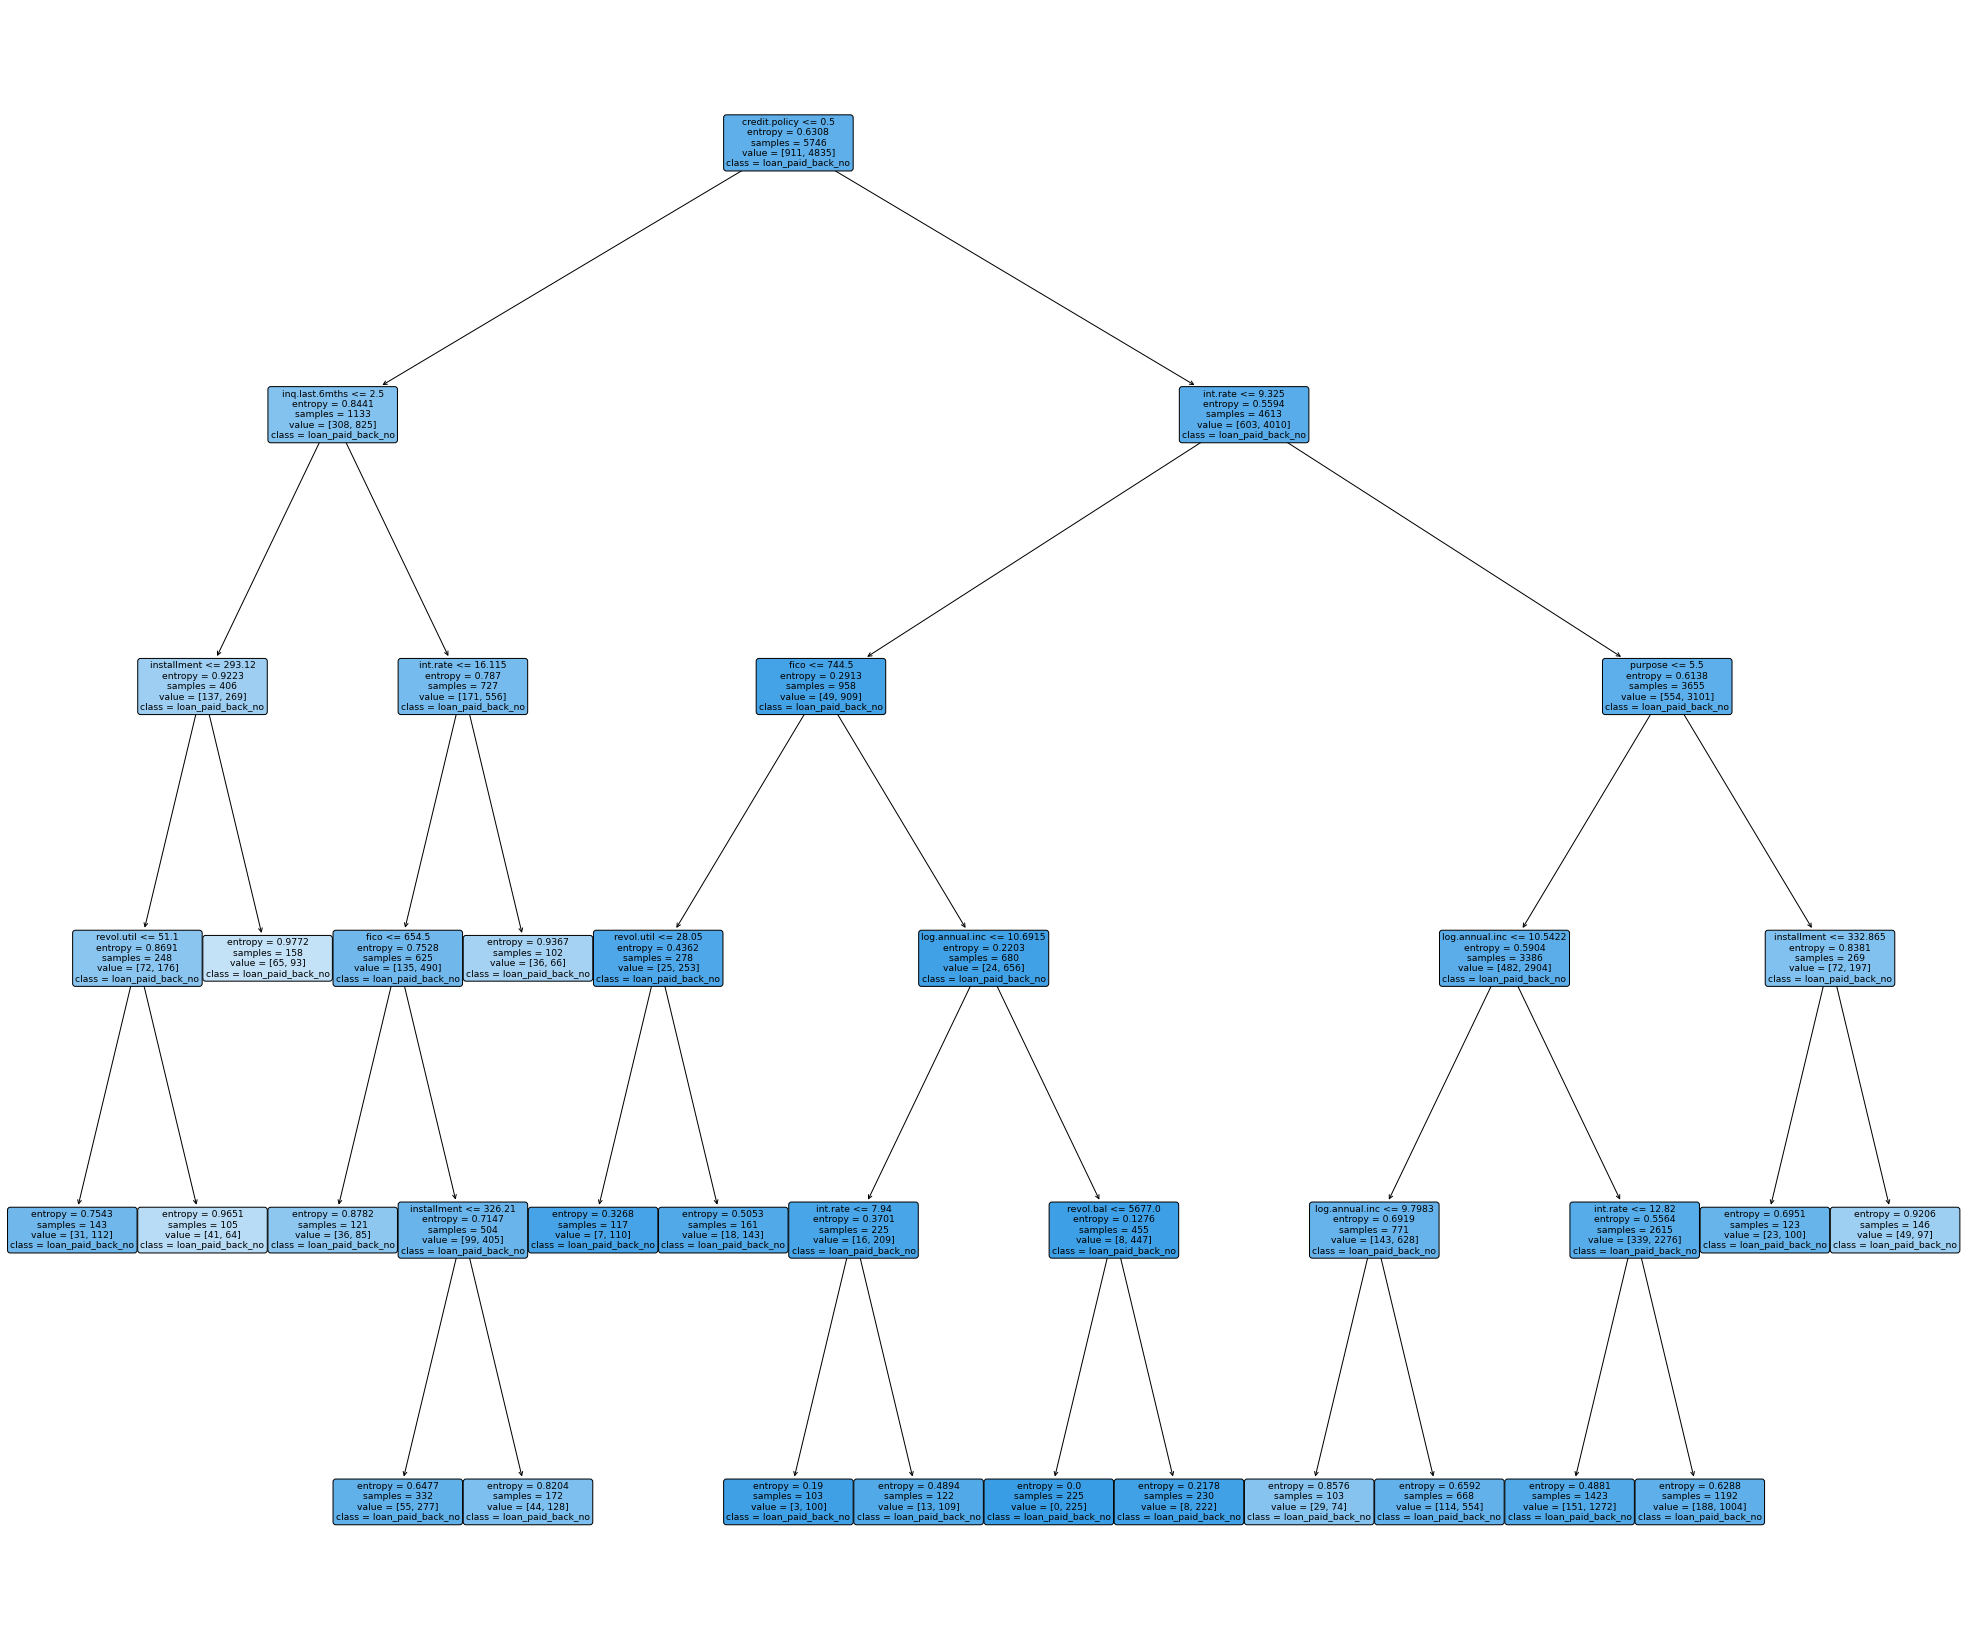

In [423]:
#Decision tree visualization using plot_tree
plt.figure(figsize=(35,30)) 
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names =['loan_paid_back_yes', 'loan_paid_back_no'] , filled = True , precision = 4, rounded = True)
plt.show()